<a href="https://colab.research.google.com/github/gopichandchalla16/infosys-internship-real-time-industry-insight-system/blob/main/Project_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infosys Springboard Internship Project
## Real-Time Industry Insight & Strategic Intelligence System
### Sprint 1 – Data Sourcing & Handling
**Team Members:** Gopichand, Anshika, Janmejay,

**Objective:** Collect, clean, and visualize real-time company or market data from external open sources.


## Step 1: Interactive User Input
We allow users to enter a **company or asset name** to fetch relevant data dynamically.


In [36]:
# User input for asset/company
company_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): ")
print(f"\nData analysis will be performed for: {company_name}")

Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): Netflix

Data analysis will be performed for: Netflix


##  Step 2: Import Required Libraries
We use the following Python libraries:
- `requests` & `BeautifulSoup` for scraping web data
- `pandas` for data manipulation
- `matplotlib` & `seaborn` for visualization
- `textblob` for sentiment analysis
- `yfinance` for market data
- `wikipedia` for Wikipedia summaries


In [37]:
# Install required libraries (run once)
!pip install yfinance textblob beautifulsoup4 lxml wikipedia feedparser faker

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import yfinance as yf
import wikipedia
from bs4 import BeautifulSoup
import feedparser
from faker import Faker
import random
import datetime

# Set seaborn style
sns.set(style="whitegrid")

## Step 3: Fetch Wikipedia Summary
We fetch a **short summary** of the asset/company from Wikipedia for context.


In [38]:
try:
    # Attempt to fetch summary by appending ' company' to the asset name
    try:
        wiki_summary = wikipedia.summary(f"{company_name} company", sentences=10) # Increased sentences to 10
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
    except wikipedia.exceptions.PageError:
        # If appending ' company' doesn't work, try the original asset name
        wiki_summary = wikipedia.summary(company_name, sentences=10) # Increased sentences to 10
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
except Exception as e:
    print(f"Could not fetch Wikipedia summary: {e}")

 Wikipedia Summary:

Netflix, Inc. is an American media company founded on August 29, 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, and currently based in Los Gatos, California, with production offices and stages at the Los Angeles-based Hollywood studios (formerly old Warner Brothers studios) and the Albuquerque Studios (formerly ABQ studios). It owns and operates an eponymous over-the-top subscription video on-demand service, which showcases acquired and original programming as well as third-party content licensed from other production companies and distributors. Netflix is also the first streaming media company to be a member of the Motion Picture Association.
Netflix initially both sold and rented DVDs by mail, but the sales were eliminated within a year to focus on the DVD rental business. In 2007, Netflix introduced streaming media and video on demand. The company expanded to Canada in 2010, followed by Latin America and the Caribbean. In 2011, the service

## Step 4: Fetch Yahoo Finance Data
We fetch **historical market data** (last 30 days) for the asset using Yahoo Finance.

In [39]:
try:
    ticker = yf.Ticker(company_name if company_name.upper() in ["BTC-USD","TSLA","AAPL"] else "BTC-USD")
    market_data = ticker.history(period="1mo", interval="1d")
    market_data.reset_index(inplace=True)
    print(f"\n Market Data Sample for {company_name}:")
    display(market_data.head())
except Exception as e:
    print(f"Could not fetch Yahoo Finance data: {e}")


 Market Data Sample for Netflix:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-09-28 00:00:00+00:00,109681.945312,112375.484375,109236.945312,112122.640625,33371048505,0.0,0.0
1,2025-09-29 00:00:00+00:00,112117.875000,114473.570312,111589.953125,114400.382812,60000147466,0.0,0.0
2,2025-09-30 00:00:00+00:00,114396.523438,114836.617188,112740.562500,114056.085938,58986330258,0.0,0.0
3,2025-10-01 00:00:00+00:00,114057.593750,118648.929688,113981.398438,118648.929688,71328680132,0.0,0.0
4,2025-10-02 00:00:00+00:00,118652.382812,121086.406250,118383.156250,120681.257812,71415163912,0.0,0.0


In [40]:
from IPython.display import display, HTML
import feedparser

# Construct RSS feed URL for Google News
news_url = f"https://news.google.com/rss/search?q={company_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(news_url)

print(f"\n Recent News Headlines for {company_name}:")

# Iterate through the first 10 news items (or fewer if less than 10)
for entry in feed.entries[:10]:
    display(HTML(f'<a href="{entry.link}">{entry.title}</a>'))
    # Display summary and source if available
    summary = getattr(entry, 'summary', 'N/A')
    source = getattr(entry, 'source', 'N/A')
    print(f"Summary: {summary}\nSource: {source.get('title', 'N/A')}\n")


 Recent News Headlines for Netflix:


Summary: <a href="https://news.google.com/rss/articles/CBMihwFBVV95cUxNWTdxcURCbFdBTkg0SDFoM19OWXA1cEJXZThfRWZsQ3pQUXBWZDRiT2JPVFZybVlqaHFQSEs5VGpxaXZ4Wko0MDlZVmtWRHh3eUkwNXg2b1BGbzg5ZkFpTEFCaDM2S3lteFh4UVdVNVRQYzIteW9KN1dPZmxnMTlZUjlYSm9WN28?oc=5" target="_blank">'One Piece' Gets Season 2 Release Date At Netflix; First Photos</a>&nbsp;&nbsp;<font color="#6f6f6f">Deadline</font>
Source: Deadline



Summary: <a href="https://news.google.com/rss/articles/CBMiggFBVV95cUxPanNUekZHYnVsUFNJVkFUZExVanZub2l2SHJubnREb2p4Y2xEaURpSnpwcTJkWlpDNXhkaTBpWjFKY2hmR2RpcXpSLV9rbkhqQTl4dEJIUTVpc3NXVWlPd3NyY1VRWG1IQVZJellGdUtiNjRfcmhBV2N2ZDFUR21KU05R?oc=5" target="_blank">Netflix's One Piece series gets a release date</a>&nbsp;&nbsp;<font color="#6f6f6f">Polygon</font>
Source: Polygon



Summary: <a href="https://news.google.com/rss/articles/CBMijwFBVV95cUxQaTdvdmdlV0RtX3hYRGhCQzh3MVhIZWtqVEEyVVlkRFR4b0FnQkQ5MTlGVW1McmpRMGVYbmRHZnN1UVhuRDVkMFFFeWtDSUtZd29LSm9veHo4RndiYTZ2cS1YZ0dvYUQ3TUFmNThnSjVvM0VLLWlnMmZNMnk2aXpEdDZsQ1RXNDhJb0R2cDF5RQ?oc=5" target="_blank">'One Piece' gets season 2 release date at Netflix</a>&nbsp;&nbsp;<font color="#6f6f6f">Yahoo</font>
Source: Yahoo



Summary: <a href="https://news.google.com/rss/articles/CBMipgFBVV95cUxOWVROX3BOVTI1aWRaNUotajJwdkNHdFd5SlhmaTJ5SFdHOTZhU3JyNFFLZmctbUVuWUZ2ZzQyZnhYakJac3dEVkc3bjdXR1VUZ3dmWkl4X0pRMkk2M1MteFBvTkxmYU15X01qNmVpYzhjdVE5MnJXOGlva1JxeGZ2bkhXUUVBTWdPWGI4OWVPWTZBNDJoclZKS092NXI0V3ZremFaejBB?oc=5" target="_blank">Netflix Latin America Bets Big on Philip K. Dick Adaptation ‘The Future Is Ours’ (EXCLUSIVE)</a>&nbsp;&nbsp;<font color="#6f6f6f">Variety</font>
Source: Variety



Summary: <a href="https://news.google.com/rss/articles/CBMilgFBVV95cUxOejNCODRCbjlzRTZ6TnF0TmpBQ0JYSjVCVmFPdjY2VVpTRU5WNC1LQTFubWlhclFyZ21DOEhzTlBlVm9jOE9YdXllR3lBeXB6LXh5TS02VmRZdmdDaVhtSzB3YXBtLUd0RUhjZVEyWHVIUjQxblY1am15ZS13YTZUTmczekxvMERQRTVPRHV0eHhmQ2RfSUE?oc=5" target="_blank">All's Fair to Stranger Things: 10 of the best TV shows to watch this November</a>&nbsp;&nbsp;<font color="#6f6f6f">BBC</font>
Source: BBC



Summary: <a href="https://news.google.com/rss/articles/CBMihwFBVV95cUxObFJFcnBrZEFUb211SE9FTFhLNldVYVpiaTI1OGg2VVZENkFxbDhabzVwSWZXcmlKYm1qSHJCS3dJaVdnQlI3TXpyVkxnaDZXMFhEM2xVN283c2pkQ0ZYY0MtR2ZvaFY4Yl9ITS1oZGZHbUFQNzJDdlJNVmlVSnhSa0x3bjRpX3M?oc=5" target="_blank">“A masterclass in crime dramas”: City of Shadows is the “addictive” new Netflix series where every clue counts</a>&nbsp;&nbsp;<font color="#6f6f6f">Good Housekeeping</font>
Source: Good Housekeeping



Summary: <a href="https://news.google.com/rss/articles/CBMikAFBVV95cUxPdlhKNHBIemhOVGllblFSM3pqVEpzVm9HYTIzLWVlekhyMnpIQTBvNzk2dFUxMFF2MjNCblFQaFdOcFQxMWxZbzREX3hyRDlCV2d2bENKLWJvQm9UTlY2UWlNZ0lCa18xZ2Jld2tJZHpUbEUxYXNEeU1tV05EOHpHNUthWGJDY3c0VGJ6RGZBLU0?oc=5" target="_blank">Crash Bandicoot Set to Return — as a Netflix Animated Series</a>&nbsp;&nbsp;<font color="#6f6f6f">IGN</font>
Source: IGN



Summary: <a href="https://news.google.com/rss/articles/CBMickFVX3lxTFAyYU1xT2psMU9iNE1YY1BoMUdFb3l4OERvWGhRbDFXeXdjUnBBLUY0YnpTbmFtWDFkeVdHNklCSVhxc0ZNa256Y1VyakR5cTBrVkN5Y1NwWEhpZ0JpSi1iazlWeDJLRktTbG5rNWtVZVZ3dw?oc=5" target="_blank">Netflix reportedly developing a Crash Bandicoot animated series</a>&nbsp;&nbsp;<font color="#6f6f6f">Polygon</font>
Source: Polygon



Summary: <a href="https://news.google.com/rss/articles/CBMimgFBVV95cUxNVC1vSGxfbDROdU54UlBnOXZ3cmJrMFZwOHRMNGRxVm1NQTdPQ1Z1OTk1Z19sM2p1aFd2VlVjdmJ1M0gxNjYtN2F0TmVuQl8zdVZMVmxIOFB4cDhtUGp0Njl3VUw0b0U2b1p6bXpJUXFqQkNQV2stREZPMDZTczlyYzhLZ1dqR2NLV1k3dzJJY2RqYjNqN2k4d1RR?oc=5" target="_blank">Crash Bandicoot Animated Series in the Works at Netflix</a>&nbsp;&nbsp;<font color="#6f6f6f">What's on Netflix</font>
Source: What's on Netflix



Summary: <a href="https://news.google.com/rss/articles/CBMiiAFBVV95cUxNYTgwM0dzOUhRTi11ZWxsNzNDWTVNQmtXbjJmOXM0ckYxTG1jSW9FY1Y2VU4tVXl4NGl1RnNfNktsWXk1UXlZRzA0dTlkVU9DZjlqRjNGUHRIZk1McHJZVjlRNlNERDhCb2JfT3lNa3F6VHQyQUw1ZDN2S1JmWG0ySmpjRnZzclRj?oc=5" target="_blank">Netflix Investors Didn't Get a Stock Split in the Latest Quarterly Report. They Got Something Better.</a>&nbsp;&nbsp;<font color="#6f6f6f">Yahoo Finance</font>
Source: Yahoo Finance



## Step 5: Fetch Google News Headlines via RSS
We fetch **recent news headlines** about the asset using Google News RSS.


In [41]:
# Construct RSS feed URL for Google News
rss_url = f"https://news.google.com/rss/search?q={company_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(rss_url)
news_items = [{"Title": entry.title, "Link": entry.link, "Published": entry.published} for entry in feed.entries[:10]]
news_df = pd.DataFrame(news_items)
print(f"\n Top 10 News Headlines for {company_name}:")
display(news_df)


 Top 10 News Headlines for Netflix:


,Title,Link,Published
0,'One Piece' Gets Season 2 Release Date At Netf...,https://news.google.com/rss/articles/CBMihwFBV...,"Tue, 28 Oct 2025 14:01:00 GMT"
1,Netflix's One Piece series gets a release date...,https://news.google.com/rss/articles/CBMiggFBV...,"Tue, 28 Oct 2025 14:55:00 GMT"
2,'One Piece' gets season 2 release date at Netf...,https://news.google.com/rss/articles/CBMijwFBV...,"Tue, 28 Oct 2025 15:45:00 GMT"
3,Netflix Latin America Bets Big on Philip K. Di...,https://news.google.com/rss/articles/CBMipgFBV...,"Tue, 28 Oct 2025 13:30:00 GMT"
4,All's Fair to Stranger Things: 10 of the best ...,https://news.google.com/rss/articles/CBMilgFBV...,"Tue, 28 Oct 2025 11:00:00 GMT"
5,“A masterclass in crime dramas”: City of Shado...,https://news.google.com/rss/articles/CBMihwFBV...,"Tue, 28 Oct 2025 11:16:28 GMT"
6,Crash Bandicoot Set to Return — as a Netflix A...,https://news.google.com/rss/articles/CBMikAFBV...,"Tue, 28 Oct 2025 09:24:39 GMT"
7,Netflix reportedly developing a Crash Bandicoo...,https://news.google.com/rss/articles/CBMickFVX...,"Mon, 27 Oct 2025 21:22:00 GMT"
8,Crash Bandicoot Animated Series in the Works a...,https://news.google.com/rss/articles/CBMimgFBV...,"Mon, 27 Oct 2025 19:04:37 GMT"
9,Netflix Investors Didn't Get a Stock Split in ...,https://news.google.com/rss/articles/CBMiiAFBV...,"Sun, 26 Oct 2025 23:49:00 GMT"


## Step 6: Generate Synthetic Tweets
We generate **50 realistic tweets** using `Faker` and random sentiment phrases for demonstration.


In [42]:
fake = Faker()
positive_phrases = [
    f"{company_name} is surging!",
    f"Profits from {company_name} are amazing!",
    f"Holding {company_name} long-term, confident.",
    f"{company_name} adoption is growing worldwide!",
    f"Investors are optimistic about {company_name}."
]

negative_phrases = [
    f"Worried about {company_name} volatility.",
    f"{company_name} might crash soon.",
    f"{company_name}'s future is uncertain.",
    f"High risks in {company_name} investments.",
    f"{company_name} energy consumption is concerning."
]

neutral_phrases = [
    f"{company_name} price remains stable today.",
    f"Market watching {company_name} closely.",
    f"{company_name} updates coming soon.",
    f"{company_name} performance unchanged.",
    f"Analysts report on {company_name} today."
]

tweets = []
for _ in range(50):
    sentiment_choice = random.choices(
        ["positive", "negative", "neutral"], weights=[0.4, 0.3, 0.3]
    )[0]
    if sentiment_choice == "positive":
        tweets.append(random.choice(positive_phrases))
    elif sentiment_choice == "negative":
        tweets.append(random.choice(negative_phrases))
    else:
        tweets.append(random.choice(neutral_phrases))

tweets_df = pd.DataFrame(tweets, columns=["Tweet"])
tweets_df.head()

,Tweet
0,Netflix's future is uncertain.
1,Netflix performance unchanged.
2,Netflix energy consumption is concerning.
3,Netflix is surging!
4,High risks in Netflix investments.


## Step 7: Preprocess Tweets & Perform Sentiment Analysis
We analyze the **polarity** of each tweet using `TextBlob` and classify them into Positive, Negative, or Neutral.


In [43]:
# Sentiment polarity
tweets_df["Polarity"] = tweets_df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
# Sentiment category
tweets_df["Sentiment"] = tweets_df["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)
tweets_df.head()

,Tweet,Polarity,Sentiment
0,Netflix's future is uncertain.,0.00,Neutral
1,Netflix performance unchanged.,0.00,Neutral
2,Netflix energy consumption is concerning.,0.00,Neutral
3,Netflix is surging!,0.00,Neutral
4,High risks in Netflix investments.,0.16,Positive


## Step 8: Visualize Sentiment Distribution
We create a **bar chart** showing how many tweets fall into each sentiment category.

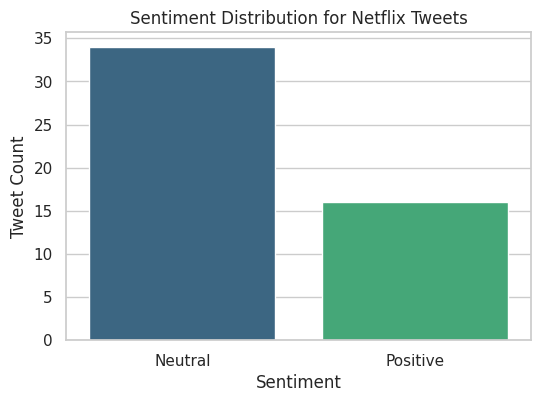

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=tweets_df, x="Sentiment", hue="Sentiment", palette="viridis", legend=False)
plt.title(f"Sentiment Distribution for {company_name} Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

## Step 9: Visualize Sentiment Trend Across Tweets
We create a **line chart** showing polarity trend across the 50 tweets.


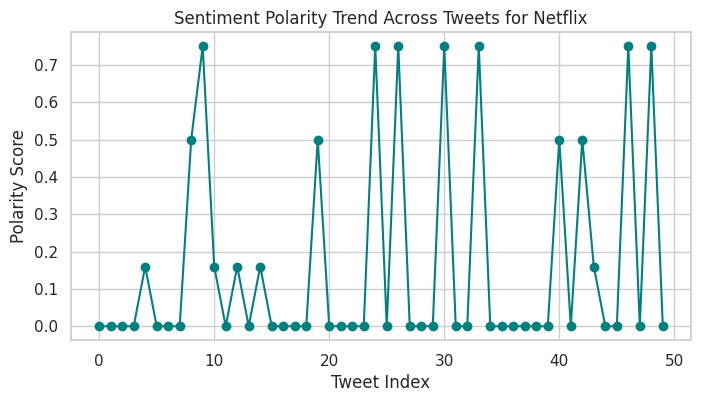

In [45]:
plt.figure(figsize=(8,4))
plt.plot(tweets_df.index, tweets_df["Polarity"], marker='o', linestyle='-', color='teal')
plt.title(f"Sentiment Polarity Trend Across Tweets for {company_name}")
plt.xlabel("Tweet Index")
plt.ylabel("Polarity Score")
plt.grid(True)
plt.show()

## Step 10: Visualize Market Price Trend
For context, we visualize the closing price of the asset over the last 30 days.


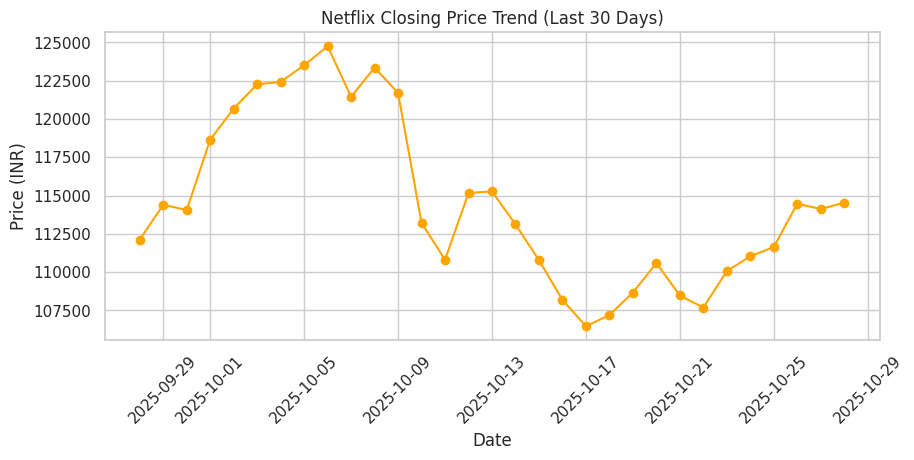

In [46]:
plt.figure(figsize=(10,4))
plt.plot(market_data["Date"], market_data["Close"], marker='o', color='orange')
plt.title(f"{company_name} Closing Price Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Using Alpha Vantage for Stock Data


First, install the library:

In [47]:
!pip install alpha_vantage

### Analyze Alpha Vantage Data
Here are some descriptive statistics for the Alpha Vantage data:

Now, let's visualize the trading volume over time:

In [49]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Alpha Vantage Key
API_KEY = "BS1CQYGKGV02PINU"

# -------- ASK USER --------
company_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS, Tesla, Bitcoin): ")
print(f"\nData analysis will be performed for: {company_name}")

# -------- SYMBOL DETECTION --------
def detect_symbol(asset_name):
    mapping = {
        "BITCOIN": "BTCUSD",
        "TESLA": "TSLA",
        "INFOSYS": "INFY",
        "RAKUTEN": "RKUNY",
        "NETFLIX": "NFLX",
        "TCS": "TCS.NS",    # Try NSE if needed
    }
    return mapping.get(asset_name.upper(), asset_name)

symbol = detect_symbol(company_name)

# -------- TREND ANALYSIS --------
def get_trend(df):
    df = df.copy()
    df['SMA20'] = df['4. close'].rolling(20).mean()
    df['SMA50'] = df['4. close'].rolling(50).mean()
    latest = df.iloc[-1]

    if latest['SMA20'] > latest['SMA50']:
        return "✅ Bullish Trend", "Consider Investing (Uptrend)"
    elif latest['SMA20'] < latest['SMA50']:
        return "❌ Bearish Trend", "Avoid / Wait for Reversal"
    else:
        return "⚠️ Sideways Market", "Neutral — Wait for breakout"

# -------- FETCH & PROCESS --------
ts = TimeSeries(key=API_KEY, output_format='pandas')

try:
    data, meta = ts.get_daily(symbol=symbol, outputsize='full')
    data = data.sort_index()

    print(f"\n📊 Latest Market Data for {company_name} ({symbol}):")
    print(data.tail(3))

    trend, decision = get_trend(data)
    print(f"\n📌 Trend Status: {trend}")
    print(f"🧾 Decision: {decision}")

except Exception as e:
    print(f"\n❌ Error fetching data for {company_name} ({symbol}): {e}")
    print("Make sure symbol is correct or try a different company name.")

Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS, Tesla, Bitcoin): Infosys

Data analysis will be performed for: Infosys

📊 Latest Market Data for Infosys (INFY):
            1. open  2. high   3. low  4. close   5. volume
date                                                       
2025-10-23    17.50   17.645  17.3500     17.53  14138830.0
2025-10-24    17.53   17.585  17.4100     17.48   8492498.0
2025-10-27    17.20   17.270  16.8907     17.04  11499739.0

📌 Trend Status: ❌ Bearish Trend
🧾 Decision: Avoid / Wait for Reversal


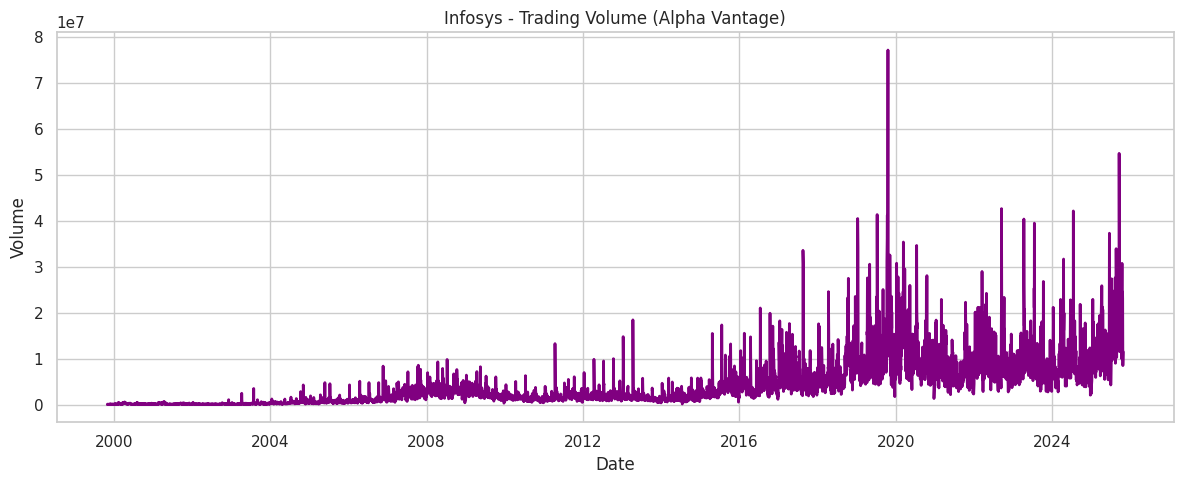

In [50]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['5. volume'], linewidth=2, color='purple')
plt.title(f"{company_name} - Trading Volume (Alpha Vantage)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

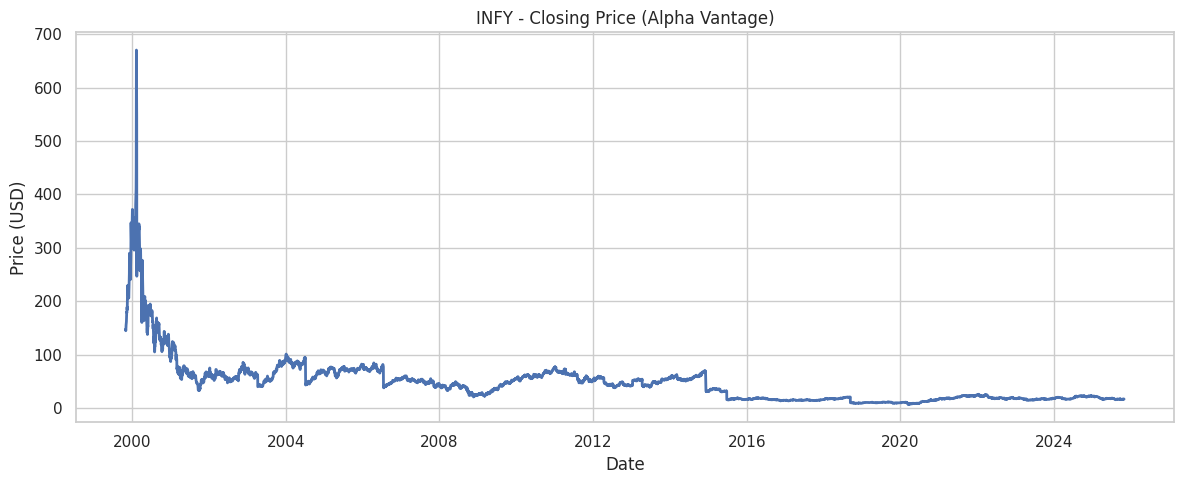

In [51]:
plt.figure(figsize=(12,5))
plt.plot(data.index, data['4. close'], linewidth=2)
plt.title(f"{symbol} - Closing Price (Alpha Vantage)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

## Sprint 1 Conclusion
**What we achieved in Sprint 1:**

1. Collected real-time open-source data from:
   - Wikipedia (summary)
   - Yahoo Finance (market prices)
   - Google News RSS (recent headlines)
   - Generated synthetic tweets (50) for sentiment analysis
2. Cleaned and structured data using **pandas DataFrames**
3. Performed sentiment analysis using **TextBlob**
4. Visualized key insights:
   - Sentiment distribution (bar chart)
   - Sentiment trend across tweets (line chart)
   - Market price trend (line chart)
5. Built a flexible, interactive notebook for any asset/company input

This notebook sets the foundation for **Sprint 2**, where we will integrate **real-time dashboards and AI-driven analytics**.
